In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
data = pd.read_csv(r"c:\Users\user\Desktop\Project\MoonLight-Energy-Solutions-Data-Analytics--Week-0\data\sierraleone-bumbuna.csv")


#rw stands for Rows with Columns.
# Selected columns that are required in the tasks are: GHI, DNI, DHI, Tamb, ModA, ModB, WS, WSgust, TModA, TModB, WD, RH, BP

# Select only positive values for GHI, DNI, and DHI
#excluded_columns = ['GHI', 'DNI', 'DHI', 'Tamb']
selected_rw = data[
    (data['GHI'] > 0) &
    (data['DNI'] > 0) &
    (data['DHI'] > 0) &
    (data['Tamb'] > 0) &
    (data['ModA'] > 0) &
    (data['ModB'] > 0) &
    (data['WS'] > 0) &
    (data['WSgust'] > 0) &
    (data['TModA'] > 0) &
    (data['TModB'] > 0) &
    (data['WD'] > 0) &
    (data['RH'] > 0) &
    (data['BP'] > 0) &
    (data['Cleaning'] > 0)
][["Timestamp", "GHI", "DNI", "DHI", "Tamb", "ModA", "ModB", "WS", "WSgust", "TModA", "TModB", "WD", "RH", "BP","Cleaning", "Comments"]]


# Randomly sample 10 positive values
selected_data = selected_rw.sample(n=10, random_state=1)  # Set random_state for reproducibility
print(selected_data)

               Timestamp    GHI    DNI    DHI  Tamb   ModA   ModB   WS  \
197793  2022-03-16 08:34  210.7   77.1  181.1  24.2  221.0  196.9  0.1   
223761  2022-04-03 09:22  340.8   49.5  312.2  26.8  350.4  338.3  0.5   
300074  2022-05-26 09:15  533.2  419.4  212.7  26.8  461.2  445.0  0.6   
373620  2022-07-16 11:01  704.3  247.5  553.1  27.1  663.8  762.6  3.0   
459900  2022-09-14 09:01  298.7    4.6  293.2  24.0  234.0  282.2  0.1   
431112  2022-08-25 09:13  189.7    1.4  189.3  24.7  186.9  180.4  0.1   
205013  2022-03-21 08:54  182.5   52.1  157.3  25.1  191.4  170.2  1.2   
416731  2022-08-15 09:32  321.8    1.7  320.7  25.7  305.9  299.0  1.0   
330271  2022-06-16 08:32  171.3    0.6  171.1  25.3  172.3  168.6  1.9   
62422   2021-12-12 08:23  202.8  102.3  155.4  25.4  235.4  215.3  1.2   

        WSgust  TModA  TModB     WD    RH    BP  Cleaning  Comments  
197793     0.7   29.4   31.1   18.2  82.1  1000         1       NaN  
223761     1.6   34.8   36.9   38.0  62.7  10

In [3]:
# Summary Statistics
# Display descriptive statistics for the selected columns
print(selected_data.describe())

              GHI         DNI         DHI       Tamb        ModA        ModB  \
count   10.000000   10.000000   10.000000  10.000000   10.000000   10.000000   
mean   315.580000   95.620000  254.610000  25.510000  302.230000  305.850000   
std    175.598436  136.349834  122.918812   1.093872  155.107182  183.390332   
min    171.300000    0.600000  155.400000  24.000000  172.300000  168.600000   
25%    192.975000    2.425000  173.600000  24.800000  198.800000  184.525000   
50%    254.700000   50.800000  201.000000  25.350000  234.700000  248.750000   
75%    336.050000   96.000000  307.450000  26.525000  339.275000  328.475000   
max    704.300000  419.400000  553.100000  27.100000  663.800000  762.600000   

              WS     WSgust      TModA      TModB          WD         RH  \
count  10.000000  10.000000  10.000000  10.000000   10.000000  10.000000   
mean    0.970000   1.790000  34.100000  35.130000  156.370000  84.100000   
std     0.926223   1.003826   5.999074   6.004082  

In [4]:
# Replace negative values with NaN in the selected columns
selected_data.loc[:, ['GHI', 'DNI', 'DHI']] = selected_rw[['GHI', 'DNI', 'DHI']].mask(selected_rw[['GHI', 'DNI', 'DHI']] < 0, np.nan)

print(selected_data.head(10))

selected_data['Timestamp'] = pd.to_datetime(selected_data['Timestamp'])
selected_data.set_index('Timestamp', inplace=True)

               Timestamp    GHI    DNI    DHI  Tamb   ModA   ModB   WS  \
197793  2022-03-16 08:34  210.7   77.1  181.1  24.2  221.0  196.9  0.1   
223761  2022-04-03 09:22  340.8   49.5  312.2  26.8  350.4  338.3  0.5   
300074  2022-05-26 09:15  533.2  419.4  212.7  26.8  461.2  445.0  0.6   
373620  2022-07-16 11:01  704.3  247.5  553.1  27.1  663.8  762.6  3.0   
459900  2022-09-14 09:01  298.7    4.6  293.2  24.0  234.0  282.2  0.1   
431112  2022-08-25 09:13  189.7    1.4  189.3  24.7  186.9  180.4  0.1   
205013  2022-03-21 08:54  182.5   52.1  157.3  25.1  191.4  170.2  1.2   
416731  2022-08-15 09:32  321.8    1.7  320.7  25.7  305.9  299.0  1.0   
330271  2022-06-16 08:32  171.3    0.6  171.1  25.3  172.3  168.6  1.9   
62422   2021-12-12 08:23  202.8  102.3  155.4  25.4  235.4  215.3  1.2   

        WSgust  TModA  TModB     WD    RH    BP  Cleaning  Comments  
197793     0.7   29.4   31.1   18.2  82.1  1000         1       NaN  
223761     1.6   34.8   36.9   38.0  62.7  10

In [5]:
# Data Quality Check
# Check for missing values
print(selected_data.isnull().sum())

# Check data types
print(selected_data.dtypes)

missing_values = selected_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for negative values in GHI, DNI, and DHI
negative_values = selected_data[(selected_data['GHI'] < 0) | (selected_data['DNI'] < 0) | (selected_data['DHI'] < 0)]
print("Negative Values:\n", negative_values)

# Identify outliers using Z-score
from scipy import stats
z_scores = stats.zscore(selected_data[['GHI', 'DNI', 'DHI', 'Tamb']])
outliers = (abs(z_scores) > 3).any(axis=1)
print("Outliers:\n", selected_data[outliers])

# Sampling data by month
monthly_data = selected_data.resample('M').mean()  # For monthly averages
daily_data = selected_data.resample('D').mean()

# Checking Outliers
Q1 = selected_data['ModA'].quantile(0.25)
Q3 = selected_data['ModA'].quantile(0.75)
IQR = Q3 - Q1
outliers_modA = selected_data[(selected_data['ModA'] < (Q1 - 1.5 * IQR)) | (selected_data['ModA'] > (Q3 + 1.5 * IQR))]
outliers_modB = selected_data[(selected_data['ModB'] < (Q1 - 1.5 * IQR)) | (selected_data['ModB'] > (Q3 + 1.5 * IQR))]
outliers_WS = selected_data[(selected_data['WS'] < (Q1 - 1.5 * IQR)) | (selected_data['WS'] > (Q3 + 1.5 * IQR))]
outliers_WSgust = selected_data[(selected_data['WSgust'] < (Q1 - 1.5 * IQR)) | (selected_data['WSgust'] > (Q3 + 1.5 * IQR))]

GHI          0
DNI          0
DHI          0
Tamb         0
ModA         0
ModB         0
WS           0
WSgust       0
TModA        0
TModB        0
WD           0
RH           0
BP           0
Cleaning     0
Comments    10
dtype: int64
GHI         float64
DNI         float64
DHI         float64
Tamb        float64
ModA        float64
ModB        float64
WS          float64
WSgust      float64
TModA       float64
TModB       float64
WD          float64
RH          float64
BP            int64
Cleaning      int64
Comments    float64
dtype: object
Missing Values:
 GHI          0
DNI          0
DHI          0
Tamb         0
ModA         0
ModB         0
WS           0
WSgust       0
TModA        0
TModB        0
WD           0
RH           0
BP           0
Cleaning     0
Comments    10
dtype: int64
Negative Values:
 Empty DataFrame
Columns: [GHI, DNI, DHI, Tamb, ModA, ModB, WS, WSgust, TModA, TModB, WD, RH, BP, Cleaning, Comments]
Index: []
Outliers:
 Empty DataFrame
Columns: [GHI, DNI, D

C:\Users\user\AppData\Local\Temp\ipykernel_16416\3902222740.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = selected_data.resample('M').mean()  # For monthly averages


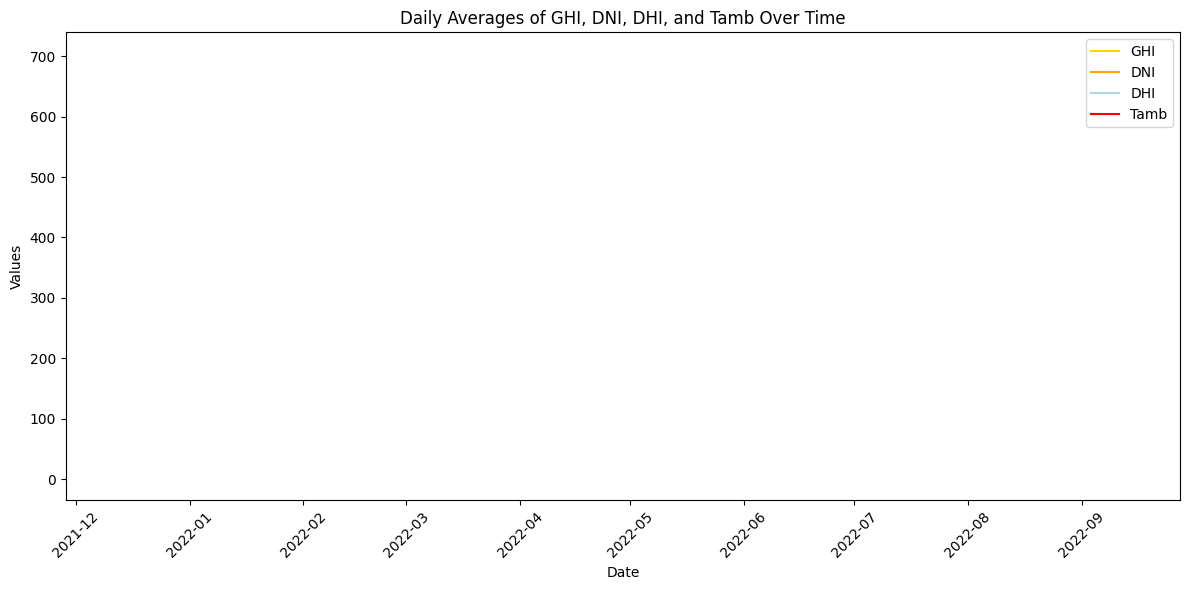

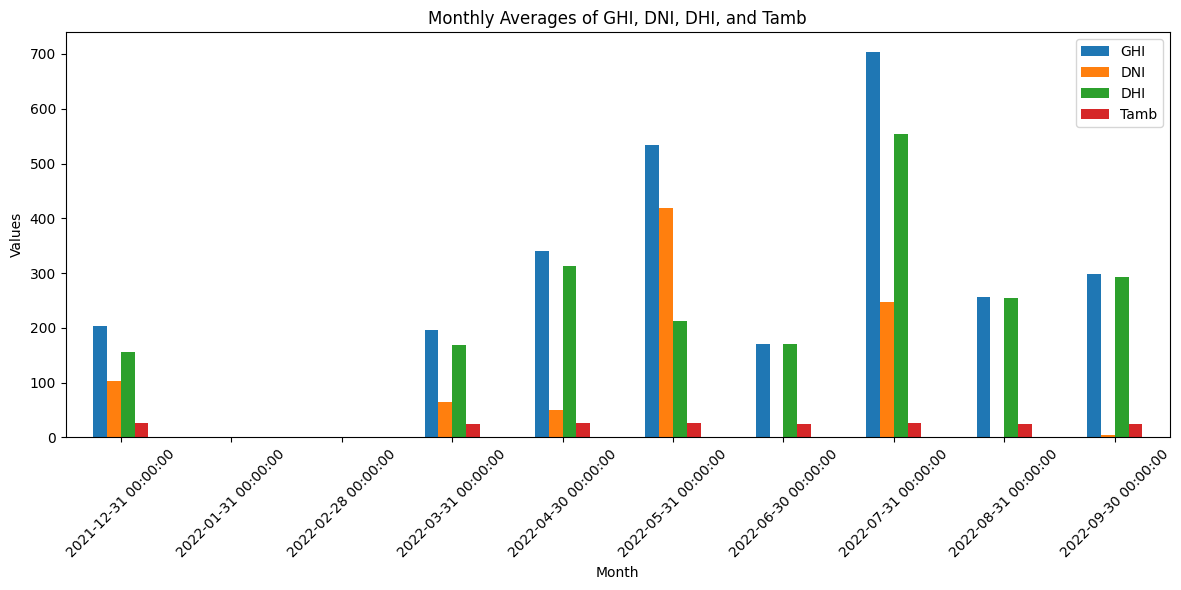

In [6]:
#Time Series Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the monthly data
plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data['GHI'], label='GHI', color='gold')
plt.plot(daily_data.index, daily_data['DNI'], label='DNI', color='orange')
plt.plot(daily_data.index, daily_data['DHI'], label='DHI', color='lightblue')
plt.plot(daily_data.index, daily_data['Tamb'], label='Tamb', color='red')
plt.title('Daily Averages of GHI, DNI, DHI, and Tamb Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the bar charts
monthly_data[['GHI', 'DNI', 'DHI', 'Tamb']].plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Averages of GHI, DNI, DHI, and Tamb')
plt.xlabel('Month')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
print(selected_data.columns.tolist())

['GHI', 'DNI', 'DHI', 'Tamb', 'ModA', 'ModB', 'WS', 'WSgust', 'TModA', 'TModB', 'WD', 'RH', 'BP', 'Cleaning', 'Comments']


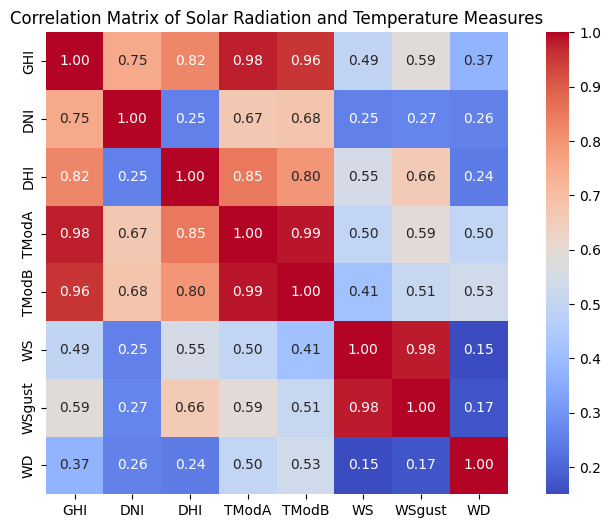

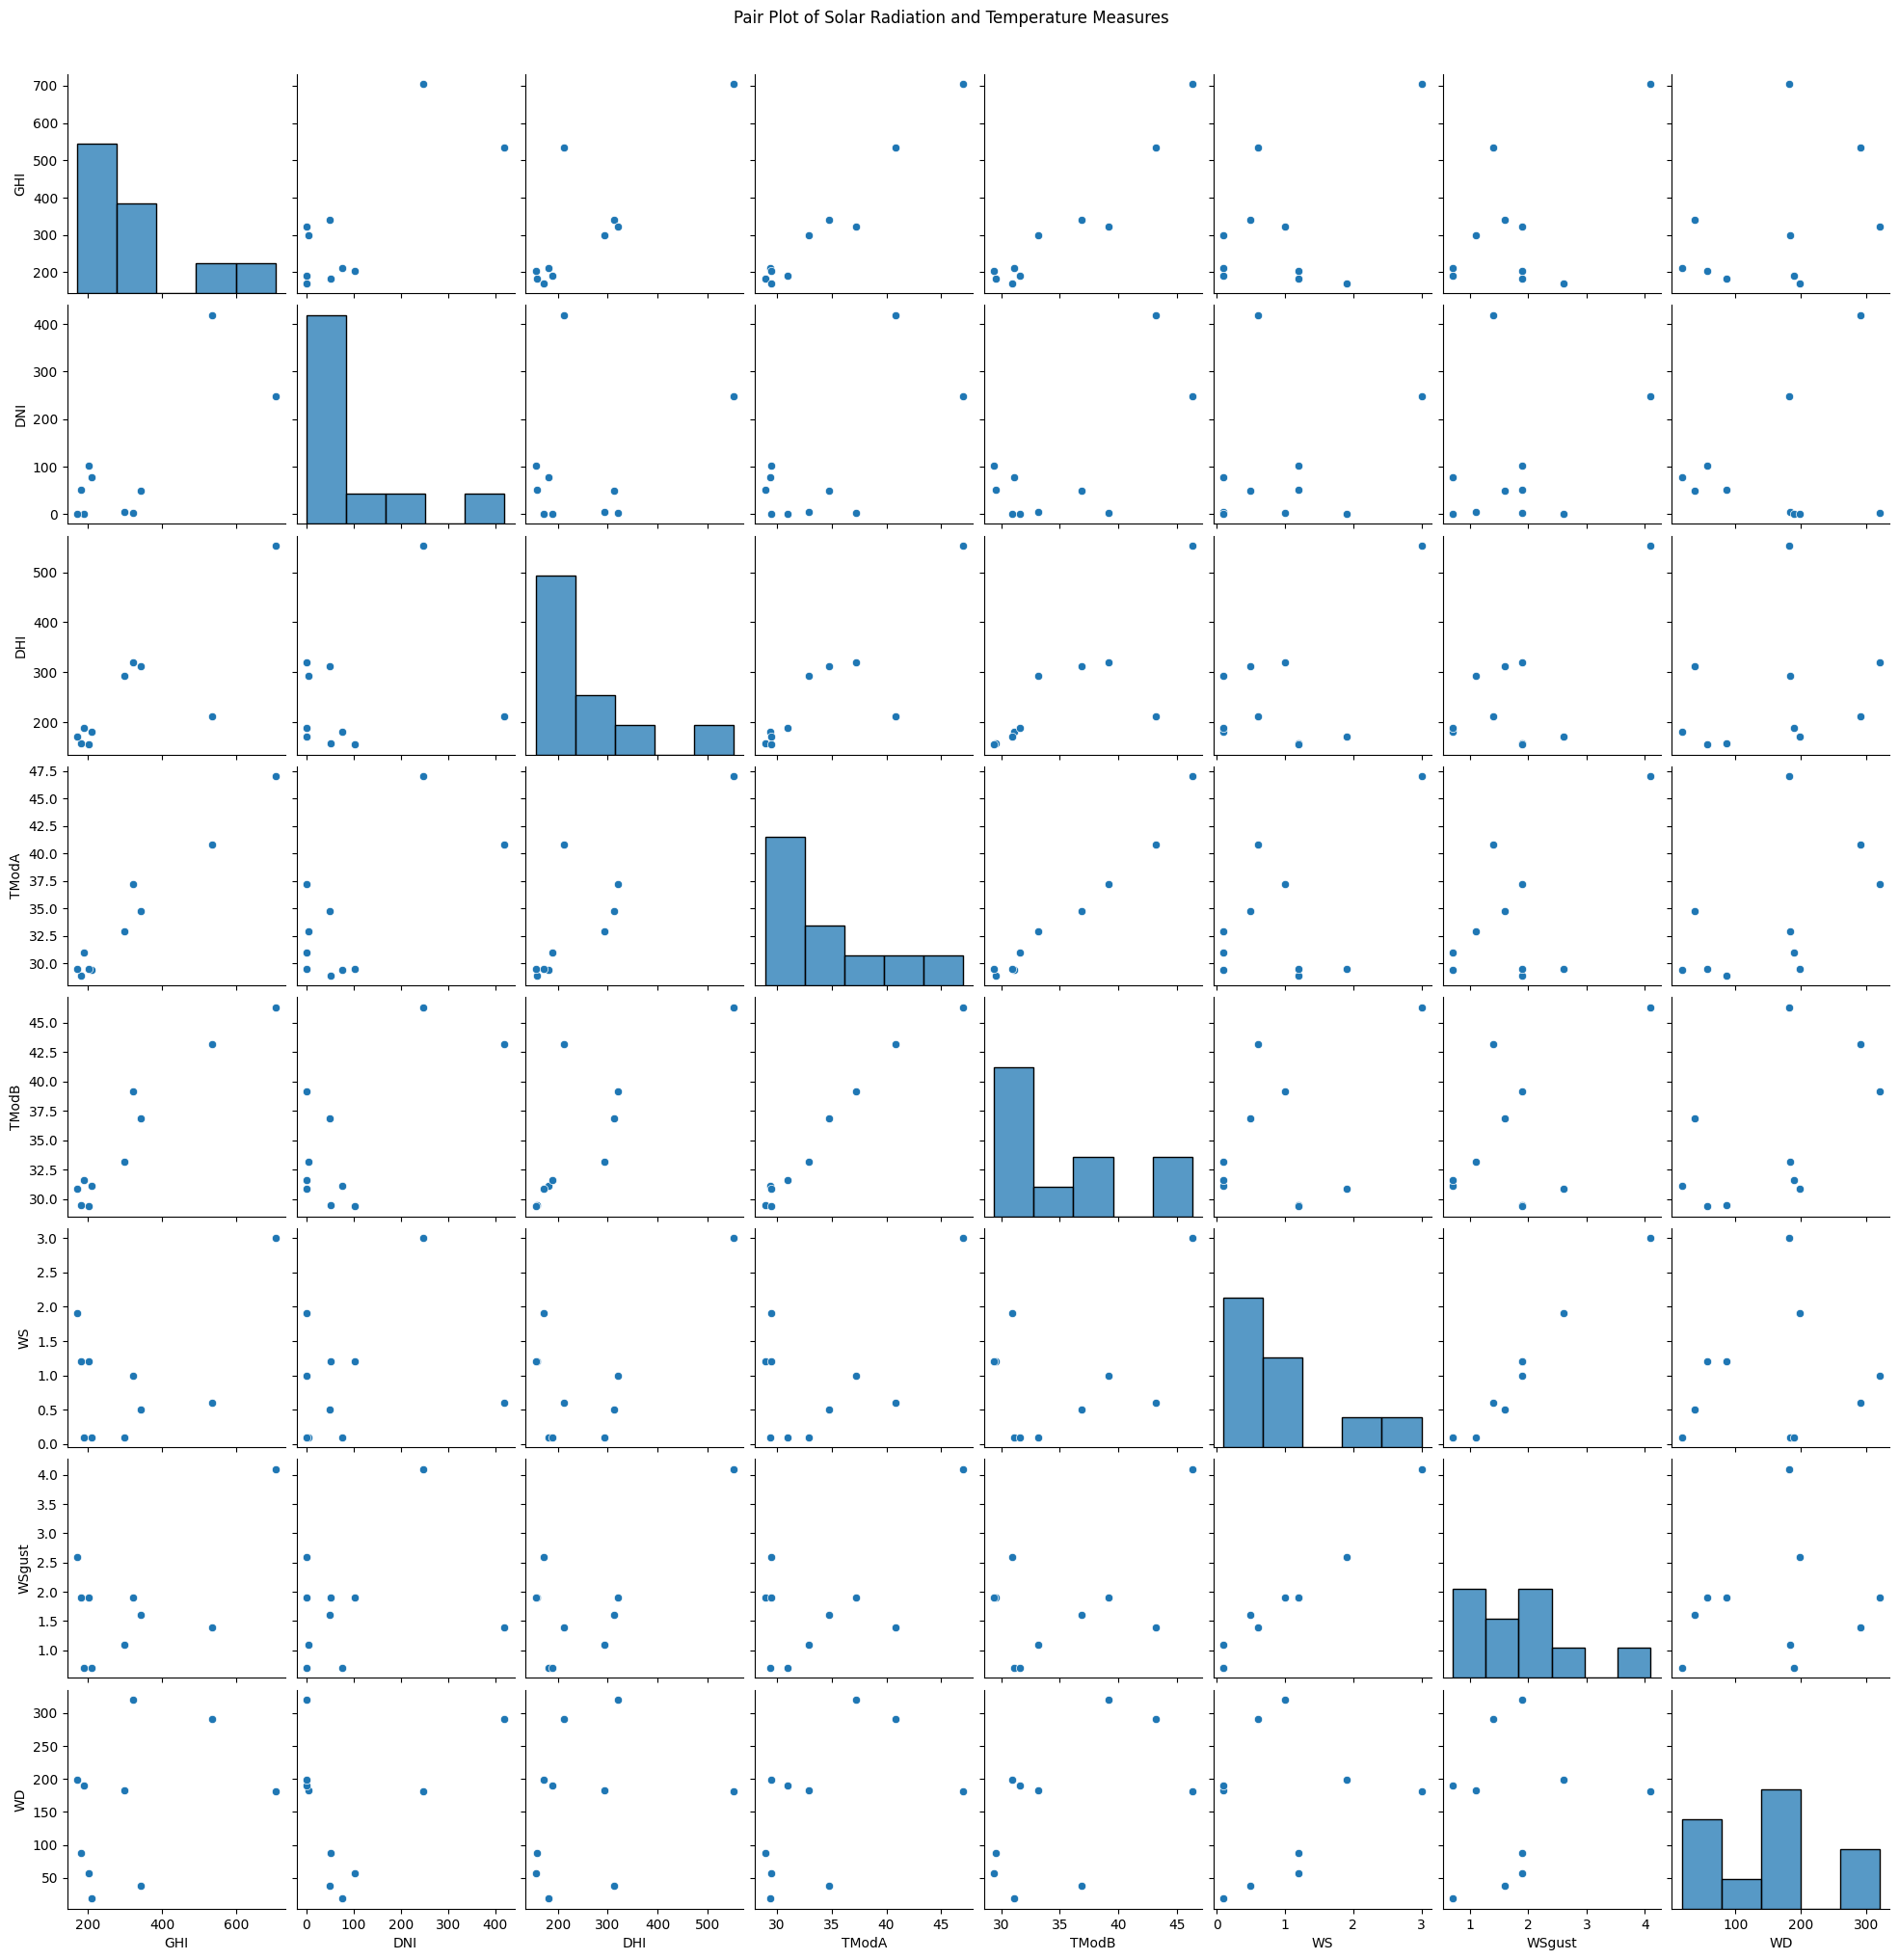

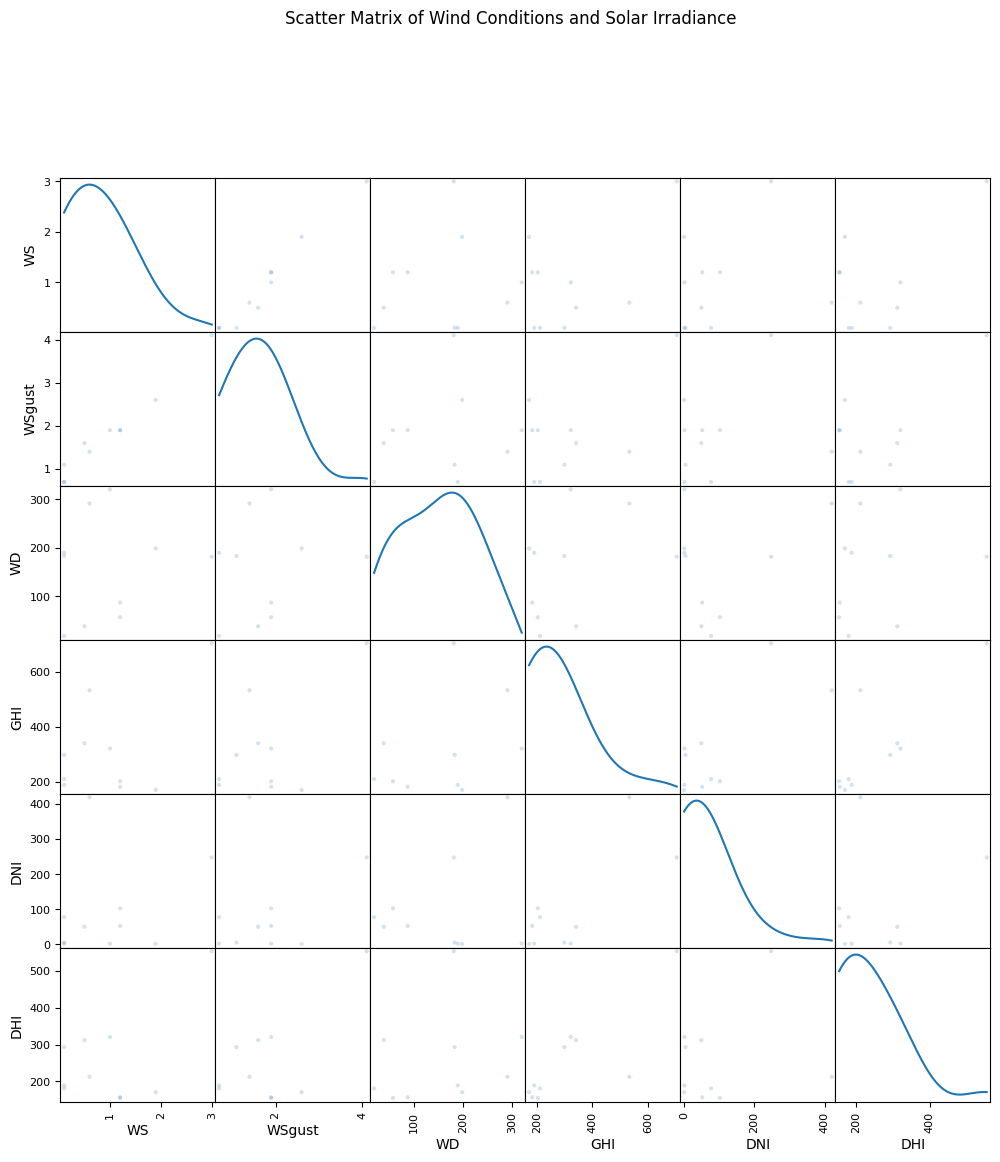

In [12]:
# Correlation Analysis
relevant_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']
data_subset = selected_data[relevant_columns]
correlation_matrix = data_subset.corr()

# Visualize Correlation Matrix

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Solar Radiation and Temperature Measures')
plt.show()

# Create Pair Plot

sns.pairplot(data_subset)
plt.suptitle('Pair Plot of Solar Radiation and Temperature Measures', y=1.02)
plt.show()

# Scatter Matrix for Wind Conditions

from pandas.plotting import scatter_matrix

wind_columns = ['WS', 'WSgust', 'WD']
scatter_matrix(selected_data[wind_columns + ['GHI', 'DNI', 'DHI']], alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.suptitle('Scatter Matrix of Wind Conditions and Solar Irradiance', y=1.02)
plt.show()

<Figure size 800x800 with 0 Axes>

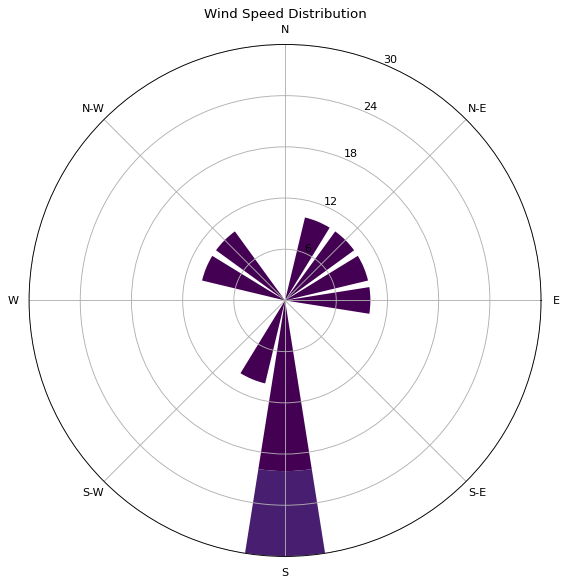

In [13]:
# Wind Analysis

wind_data = selected_data[['WS', 'WSgust', 'WD']]

from windrose import WindroseAxes
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(wind_data['WD'], wind_data['WS'], bins=np.arange(0, 25, 2), normed=True)
ax.set_title ("Wind Speed Distribution")
plt.show()


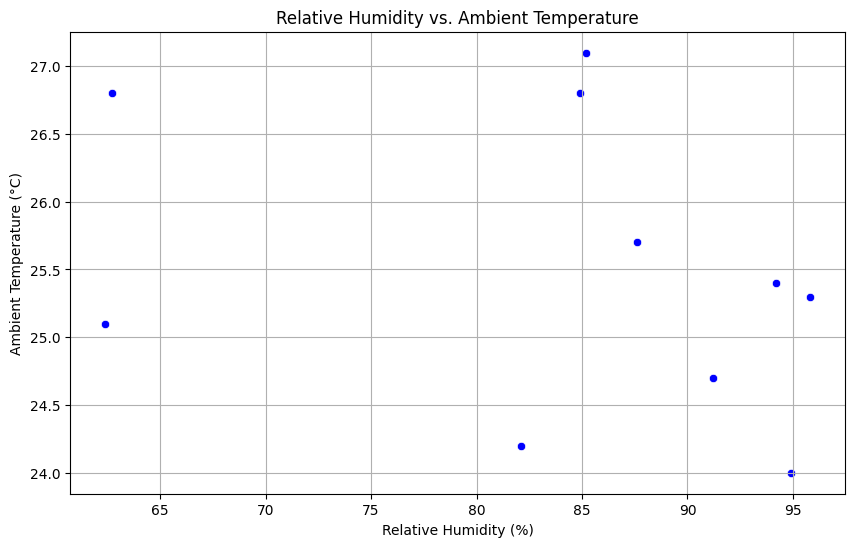

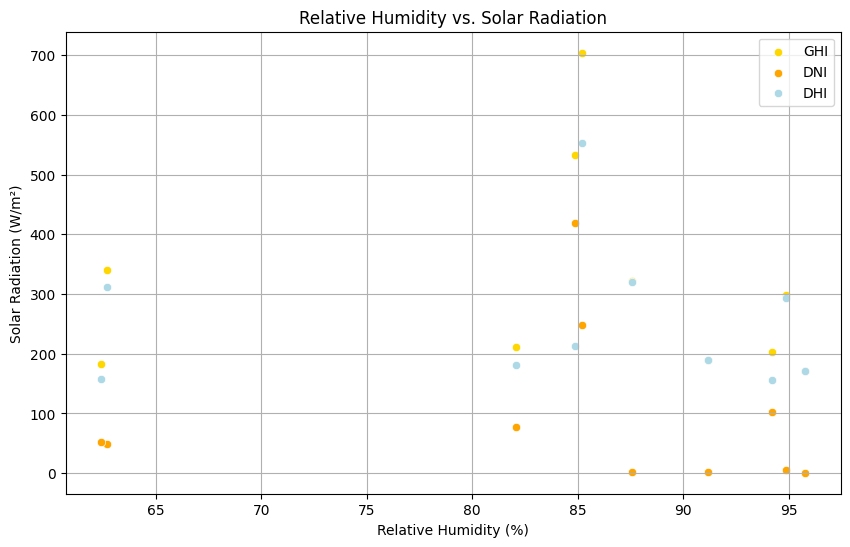

            RH      Tamb       GHI       DNI       DHI
RH    1.000000 -0.317057 -0.037254 -0.041905 -0.034922
Tamb -0.317057  1.000000  0.748882  0.638367  0.550905
GHI  -0.037254  0.748882  1.000000  0.751046  0.824874
DNI  -0.041905  0.638367  0.751046  1.000000  0.254652
DHI  -0.034922  0.550905  0.824874  0.254652  1.000000


In [14]:
# Temperature Analysis

Temp_data = selected_data[['RH', 'Tamb', 'GHI', 'DNI' , 'DHI']]

# Scatter plot for RH vs. Tamb
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Temp_data, x='RH', y='Tamb', color='blue')
plt.title('Relative Humidity vs. Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.grid()
plt.show()

# Scatter plots for RH vs. Solar Radiation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Temp_data, x='RH', y='GHI', color='gold', label='GHI')
sns.scatterplot(data=Temp_data, x='RH', y='DNI', color='orange', label='DNI')
sns.scatterplot(data=Temp_data, x='RH', y='DHI', color='lightblue', label='DHI')
plt.title('Relative Humidity vs. Solar Radiation')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Solar Radiation (W/m²)')
plt.legend()
plt.grid()
plt.show()

# Calculate Correlation
correlation_matrix = Temp_data.corr()
print(correlation_matrix)

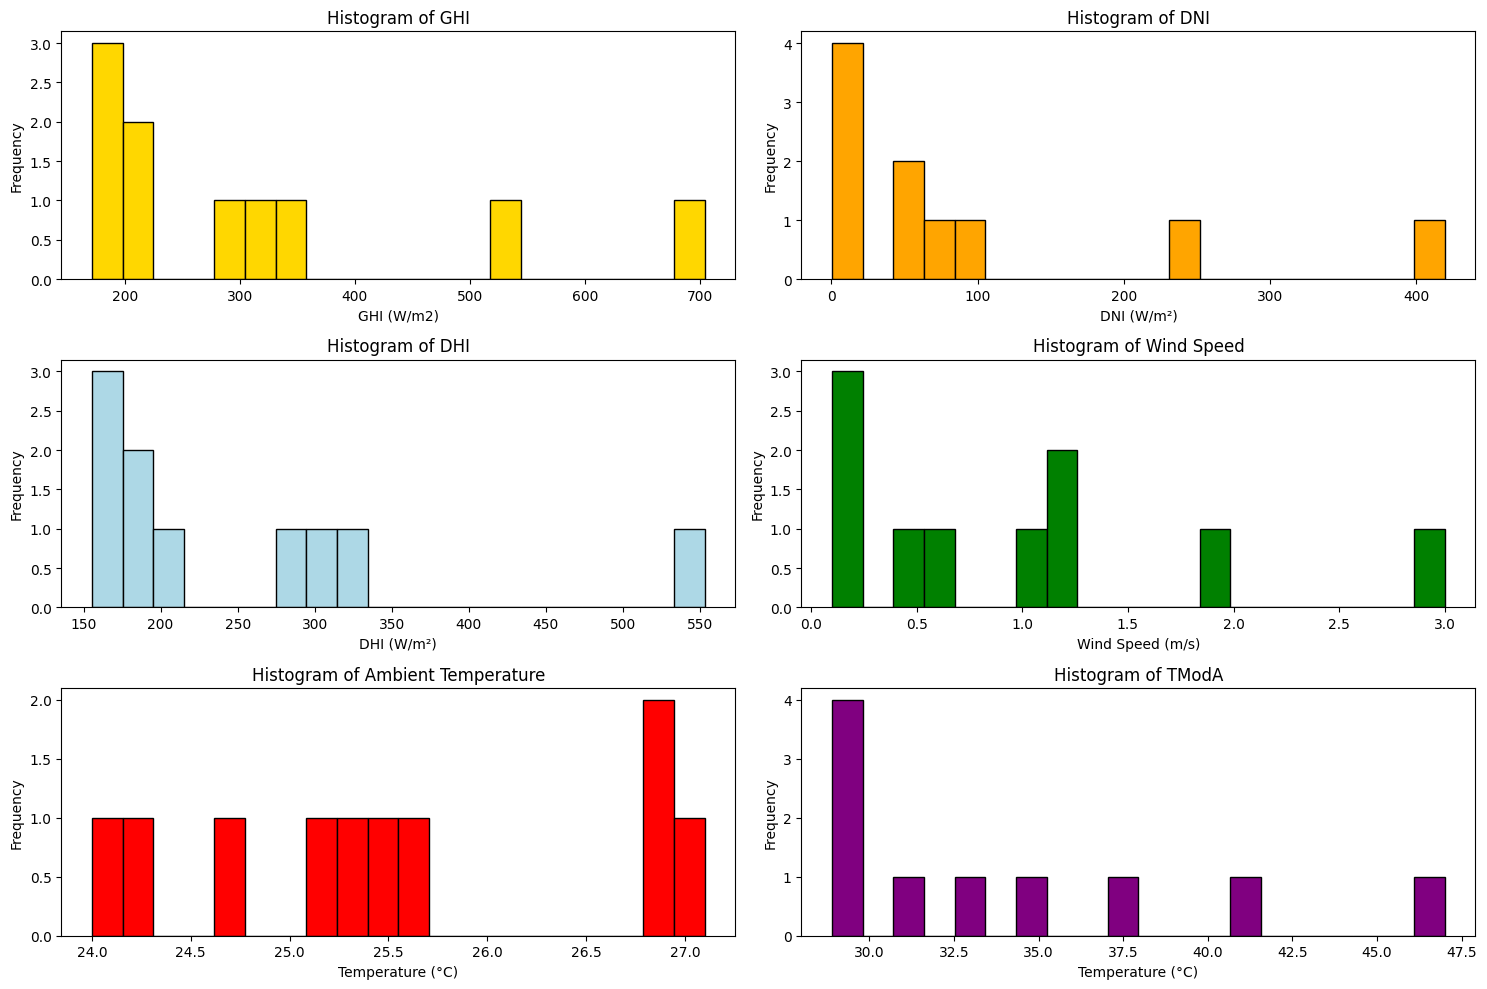

In [15]:
# Histograms
his_data = selected_data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'TModA', 'TModB']]

plt.figure(figsize=(15, 10))

# Histogram for GHI
plt. subplot(3, 2, 1)
plt.hist(his_data['GHI'], bins=20, color='gold', edgecolor='black')
plt.title("Histogram of GHI")
plt.xlabel('GHI (W/m2)')
plt.ylabel('Frequency')

# Histogram for DNI
plt.subplot(3, 2, 2)
plt.hist(his_data['DNI'], bins=20, color='orange', edgecolor='black')
plt.title('Histogram of DNI')
plt.xlabel('DNI (W/m²)')
plt.ylabel('Frequency')

# Histogram for DHI
plt.subplot(3, 2, 3)
plt.hist(his_data['DHI'], bins=20, color='lightblue', edgecolor='black')
plt.title('Histogram of DHI')
plt.xlabel('DHI (W/m²)')
plt.ylabel('Frequency')

# Histogram for Wind Speed (WS)
plt.subplot(3, 2, 4)
plt.hist(his_data['WS'], bins=20, color='green', edgecolor='black')
plt.title('Histogram of Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')

# Histogram for Ambient Temperature (Tamb)
plt.subplot(3, 2, 5)
plt.hist(his_data['Tamb'], bins=20, color='red', edgecolor='black')
plt.title('Histogram of Ambient Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Histogram for TModA
plt.subplot(3, 2, 6)
plt.hist(his_data['TModA'], bins=20, color='purple', edgecolor='black')
plt.title('Histogram of TModA')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()



In [16]:
# Z-Score Analysis
# Select relevant columns
zdata = selected_data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'TModA', 'TModB']]

# Calculate mean and standard deviation
means = zdata.mean()
stds = zdata.std()

# Compute Z-scores
zScore = (zdata - means) / stds

# Define outlier threshold
outlier_threshold = 3

# Identify outliers
outliers = (zScore.abs() > outlier_threshold)

# Create a copy of the data and concatenate Z-scores
outlier_summary = pd.concat([zdata, zScore.add_suffix('_Z')], axis=1)

# Add an outlier flag
outlier_summary['Outlier'] = outliers.any(axis=1)

# Print the outlier summary
print(outlier_summary)


                       GHI    DNI    DHI   WS  Tamb  TModA  TModB     GHI_Z  \
Timestamp                                                                     
2022-03-16 08:34:00  210.7   77.1  181.1  0.1  24.2   29.4   31.1 -0.597272   
2022-04-03 09:22:00  340.8   49.5  312.2  0.5  26.8   34.8   36.9  0.143623   
2022-05-26 09:15:00  533.2  419.4  212.7  0.6  26.8   40.8   43.2  1.239305   
2022-07-16 11:01:00  704.3  247.5  553.1  3.0  27.1   47.0   46.3  2.213687   
2022-09-14 09:01:00  298.7    4.6  293.2  0.1  24.0   32.9   33.2 -0.096128   
2022-08-25 09:13:00  189.7    1.4  189.3  0.1  24.7   31.0   31.6 -0.716863   
2022-03-21 08:54:00  182.5   52.1  157.3  1.2  25.1   28.9   29.5 -0.757866   
2022-08-15 09:32:00  321.8    1.7  320.7  1.0  25.7   37.2   39.2  0.035422   
2022-06-16 08:32:00  171.3    0.6  171.1  1.9  25.3   29.5   30.9 -0.821647   
2021-12-12 08:23:00  202.8  102.3  155.4  1.2  25.4   29.5   29.4 -0.642261   

                        DNI_Z     DHI_Z      WS_Z  

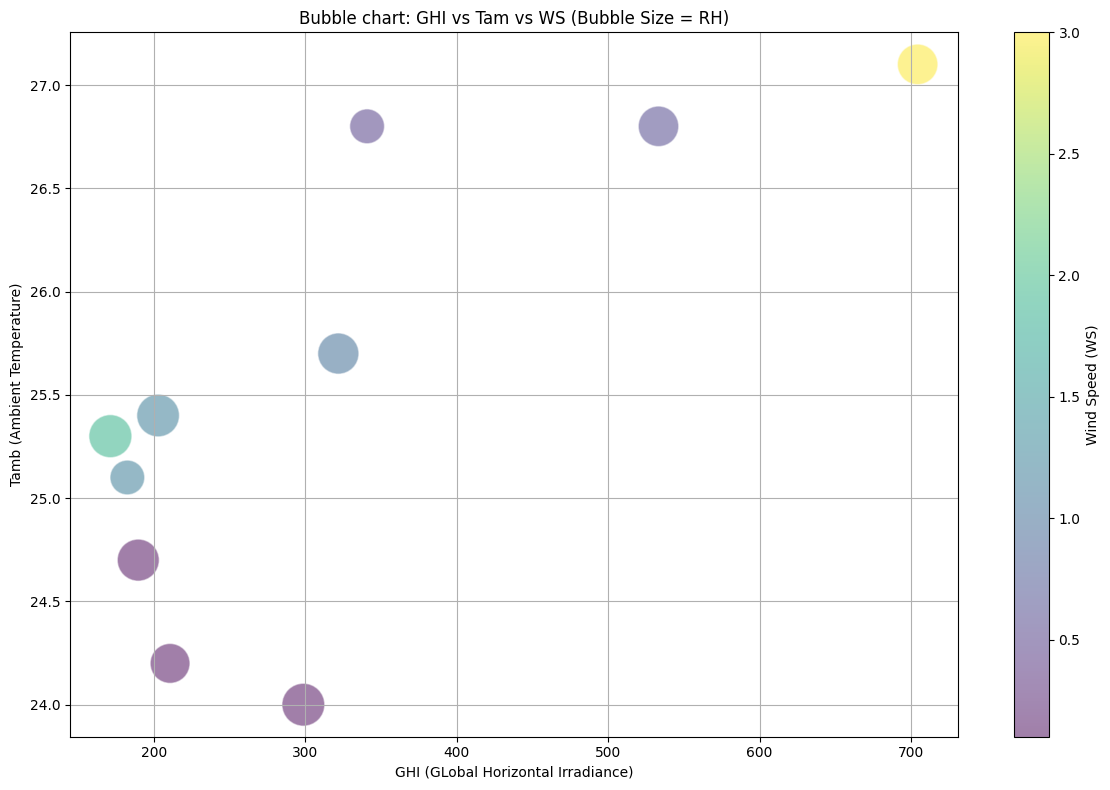

In [17]:
# Bubble charts

bubble_data = selected_data[['GHI', 'Tamb', 'WS', 'RH', 'BP']]

plt.figure(figsize=(12,8))

bubble_size = bubble_data['RH'] * 10
plt.scatter(bubble_data["GHI"], bubble_data['Tamb'], s=bubble_size, alpha=0.5, c=bubble_data['WS'], cmap='viridis', edgecolors='w')

plt.title("Bubble chart: GHI vs Tam vs WS (Bubble Size = RH)")
plt.xlabel("GHI (GLobal Horizontal Irradiance)")
plt.ylabel('Tamb (Ambient Temperature)')
plt.colorbar(label='Wind Speed (WS)')

plt.grid()
plt.tight_layout()
plt.show()

In [18]:
from scipy import stats
z_scores = np.abs(stats.zscore(selected_data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']]))
selected_data = selected_data[(z_scores < 3).all(axis=1)]

Q1 = selected_data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].quantile(0.25)
Q3 = selected_data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].quantile(0.75)
IQR = Q3 - Q1
selected_data = selected_data[~((selected_data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']] < (Q1 - 1.5 * IQR)) |
           (selected_data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']] > (Q3 + 1.5 * IQR))).any(axis=1)]
